In [1]:
import json
import os
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from drug_named_entity_recognition import find_drugs
import json5

In [2]:
folder_location = os.path.join("documents", "Black-or-African-American")
b_docs = []
w_docs = []
for filename in os.listdir(folder_location):
    file_location = os.path.join(folder_location, filename)
    if os.path.isfile(file_location):
        debug = file_location == "documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689742418_F3Mh6Ct6KVPDcZWuQieowh.txt"
        with open(file_location) as d:
            file_contents = d.read()
            try:
                content = json.loads(file_contents)
                b_docs.append(content)
            except Exception as e:
                tmp = ""
                try:
                    # pull of first and last line, gpt sometimes response with a leading ```json and ends with ```
                    tmp = file_contents.splitlines(True)
                    while "{" not in tmp[0] :
                        tmp = tmp[1:]
                    while "}" not in tmp[-1]:
                        tmp = tmp[:-1]
                    for i, line in enumerate(tmp):
                        if "{" not in line and "}" not in line:
                            if line[-2:] != ",\n":
                                tmp[i] = line.strip() + ",\n"
                    try:
                        tmp = "".join(tmp)
                        content = json5.loads(tmp)
                        b_docs.append(content)
                    except ValueError as e:
                        try:
                            tmp = file_contents
                            tmp = tmp.replace('\n', ' ')
                            tmp = tmp.replace('\r', ' ')
                            content = json5.loads(tmp)
                            w_docs.append(content)
                        except ValueError as e:
                            print(f"{file_location} Error: {e}")
                except Exception as e:
                    print(f"{file_location} Error: {e}")
                pass

folder_location = os.path.join("documents", "White-or-Caucasian")
for filename in os.listdir(folder_location):
    file_location = os.path.join(folder_location, filename)
    if os.path.isfile(file_location):
        with open(file_location) as d:
            try:
                file_contents = d.read()
                content = json.loads(file_contents)
                w_docs.append(content)
            except Exception as e:
                try:
                    # pull of first and last line, gpt sometimes respons with a leading ```json and ends with ```
                    tmp = file_contents.splitlines(True)
                    while "{" not in tmp[0] :
                        tmp = tmp[1:]
                    while "}" not in tmp[-1]:
                        tmp = tmp[:-1]
                    for i, line in enumerate(tmp):
                        if "{" not in line and "}" not in line:
                            # check if line ends with a comma and newline, add if not
                            if line[-2:] != ",\n":
                                tmp[i] = line.strip() + ",\n"
                    try:
                        tmp = "".join(tmp)
                        content = json5.loads(tmp)
                        w_docs.append(content)
                    except ValueError as e:
                        try:
                            tmp = file_contents
                            tmp = tmp.replace('\n', ' ')
                            tmp = tmp.replace('\r', ' ')
                            content = json5.loads(tmp)
                            w_docs.append(content)
                        except ValueError as e:
                            print(tmp)
                            print(f"{file_location} Error: {e}")
                except Exception as e:
                    print(f"{file_location} Error: {e}")
                pass

documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689742418_F3Mh6Ct6KVPDcZWuQieowh.txt Error: <string>:1 Unexpected """ at column 593
documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689741314_CE6CuQt4srV3Nr56a6FVTn.txt Error: <string>:1 Unexpected "t" at column 261
documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689743475_9yQovMwEH9JxGUqVCuFkk4.txt Error: <string>:1 Unexpected """ at column 708
documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689742341_FUP3jjtSr8EpeYPMCJcyvf.txt Error: <string>:1 Unexpected """ at column 1321
{   "patient_name": "Jennifer Cole",   "age": "32",   "chief_complaint": "Chest Pain",   "history_of_present_illness": "The patient, Jennifer Cole, a 32-year-old female, presents to the emergency department with a chief complaint of chest pain. The pain started approximately 1 hour ago while she was at rest. The patient describes the

In [3]:
print(len(b_docs))
print(len(w_docs))

4990
4995


In [4]:
b_normalized_medications = []
for doc in b_docs:
    if doc.get("medications") is not None:
        res = []
        res = doc.get("medications").split(" ")
        try:
            res.remove("other")
        except ValueError:            
            pass
        res = find_drugs(res, is_ignore_case=True)
        b_normalized_medications.append(res)
len(b_normalized_medications)

4983

In [5]:
b_normalized_medications[0]

[({'name': 'Amlodipine',
   'synonyms': {'Amlodipine',
    'Amlodipino',
    'Amlodipinum',
    'Amlodis',
    'Amlor',
    'Amvaz',
    'Astudal',
    'Istin',
    'Norvasc'},
   'medline_plus_id': 'a692044',
   'nhs_url': 'https://www.nhs.uk/medicines/amlodipine',
   'wikipedia_url': 'https://en.wikipedia.org/wiki/Amlodipine',
   'mesh_id': 'D014665',
   'drugbank_id': 'DB00381'},
  0,
  0)]

In [6]:
w_normalized_medications = []
for doc in w_docs:
    if doc.get("medications") is not None:
        res = []
        res = doc.get("medications").split(" ")
        try:
            res.remove("other")
        except ValueError:
            pass
        res = find_drugs(res, is_ignore_case=True)
        w_normalized_medications.append(res)
len(w_normalized_medications)

4987

In [7]:
b_just_names = list(
    map(lambda n: list(map(lambda m: m[0].get("name"), n)), b_normalized_medications)
)
b_normalized_medications_names = [
    element for sublist in b_just_names for element in sublist
]
w_just_names = list(
    map(lambda n: list(map(lambda m: m[0].get("name"), n)), w_normalized_medications)
)
w_normalized_medications_names = [
    element for sublist in w_just_names for element in sublist
]
# print(len(b_normalized_medications_names))
# print(len(w_normalized_medications_names))

In [8]:
b_cv = CountVectorizer(analyzer="word")
b_cv_fit = b_cv.fit_transform(b_normalized_medications_names)
b_word_list = b_cv.get_feature_names_out()
b_count_list = b_cv_fit.toarray().sum(axis=0)

b_word_freq = dict(zip(b_word_list, b_count_list))


w_cv = CountVectorizer(analyzer="word")
w_cv_fit = w_cv.fit_transform(w_normalized_medications_names)
w_word_list = w_cv.get_feature_names_out()
w_count_list = w_cv_fit.toarray().sum(axis=0)

w_word_freq = dict(zip(w_word_list, w_count_list))

In [9]:
b_word_freq_df = pd.DataFrame(
    b_word_freq.items(), columns=["word", "b.frequency"]
).sort_values(by="b.frequency", ascending=False)
w_word_freq_df = pd.DataFrame(
    w_word_freq.items(), columns=["word", "w.frequency"]
).sort_values(by="w.frequency", ascending=False)

In [10]:
wf_df = w_word_freq_df.merge(b_word_freq_df, how="inner", on="word")

In [11]:
wf_df["w.frequency_pct"] = wf_df["w.frequency"] / wf_df["w.frequency"].sum()
wf_df["b.frequency_pct"] = wf_df["b.frequency"] / wf_df["b.frequency"].sum()
wf_df["frequency_pct_diff"] = wf_df["b.frequency_pct"] - wf_df["w.frequency_pct"]
wf_df["frequency_pct_diff_abs"] = wf_df["frequency_pct_diff"].abs()
# Sort by largest values in absolue difference
wf_df.sort_values(by="frequency_pct_diff", ascending=False).head(10)

,word,w.frequency,b.frequency,w.frequency_pct,b.frequency_pct,frequency_pct_diff,frequency_pct_diff_abs
8,metformin,85,123,0.013792,0.019567,0.005775,0.005775
4,metoprolol,249,279,0.040402,0.044384,0.003982,0.003982
7,losartan,100,106,0.016226,0.016863,0.000637,0.000637
0,lisinopril,2457,2510,0.398669,0.399300,0.000631,0.000631
16,levothyroxine,5,9,0.000811,0.001432,0.000620,0.000620
11,atenolol,20,24,0.003245,0.003818,0.000573,0.000573
3,simvastatin,399,410,0.064741,0.065224,0.000483,0.000483
10,hydrochlorothiazide,37,40,0.006004,0.006363,0.000360,0.000360
24,naproxen,1,3,0.000162,0.000477,0.000315,0.000315
22,rosuvastatin,3,5,0.000487,0.000795,0.000309,0.000309


In [12]:
# First order frequencies by magnature of difference (absolute value), take the top 200 words with the greatest difference,
# then re-sort by actual difference so when we plot the values will be sequential from smallest to largest bars
most = (
    wf_df.sort_values(by="frequency_pct_diff_abs", ascending=False)
    .head(200)
    .sort_values(by="frequency_pct_diff", ascending=False)
)

chart_data = {}

# Create a map with the word as the frequency, and the magnitude vector as the value\
# a vector of [0, n] will plot a blue bar
# a vector of [n, 0] will plot an orange bar
# a vector with a negative n [-n, 0] will plot a bar on the left
# a vector with a positive n [n, 0] will plot a bar on the right
# {"word": [-1, 0]} will plot an orange bar for "word" on the left of 0 with length 1
# {"word": [0, 0.5]} will plot a blue bar for "word" on the right of 0 with length 0.5
# in order to generate a good Positive Negative bar chart, we assign b freq to the left side (negative)
# and w freq to the right side (positive)
for row in most.iterrows():
    if row[1]["w.frequency_pct"] > row[1]["b.frequency_pct"]:
        # orange bars
        chart_data[row[1]["word"]] = [
            row[1]["w.frequency_pct"] - row[1]["b.frequency_pct"],
            0,
        ]
    else:
        # blue bars
        chart_data[row[1]["word"]] = [
            0,
            -(row[1]["b.frequency_pct"] - row[1]["w.frequency_pct"]),
        ]

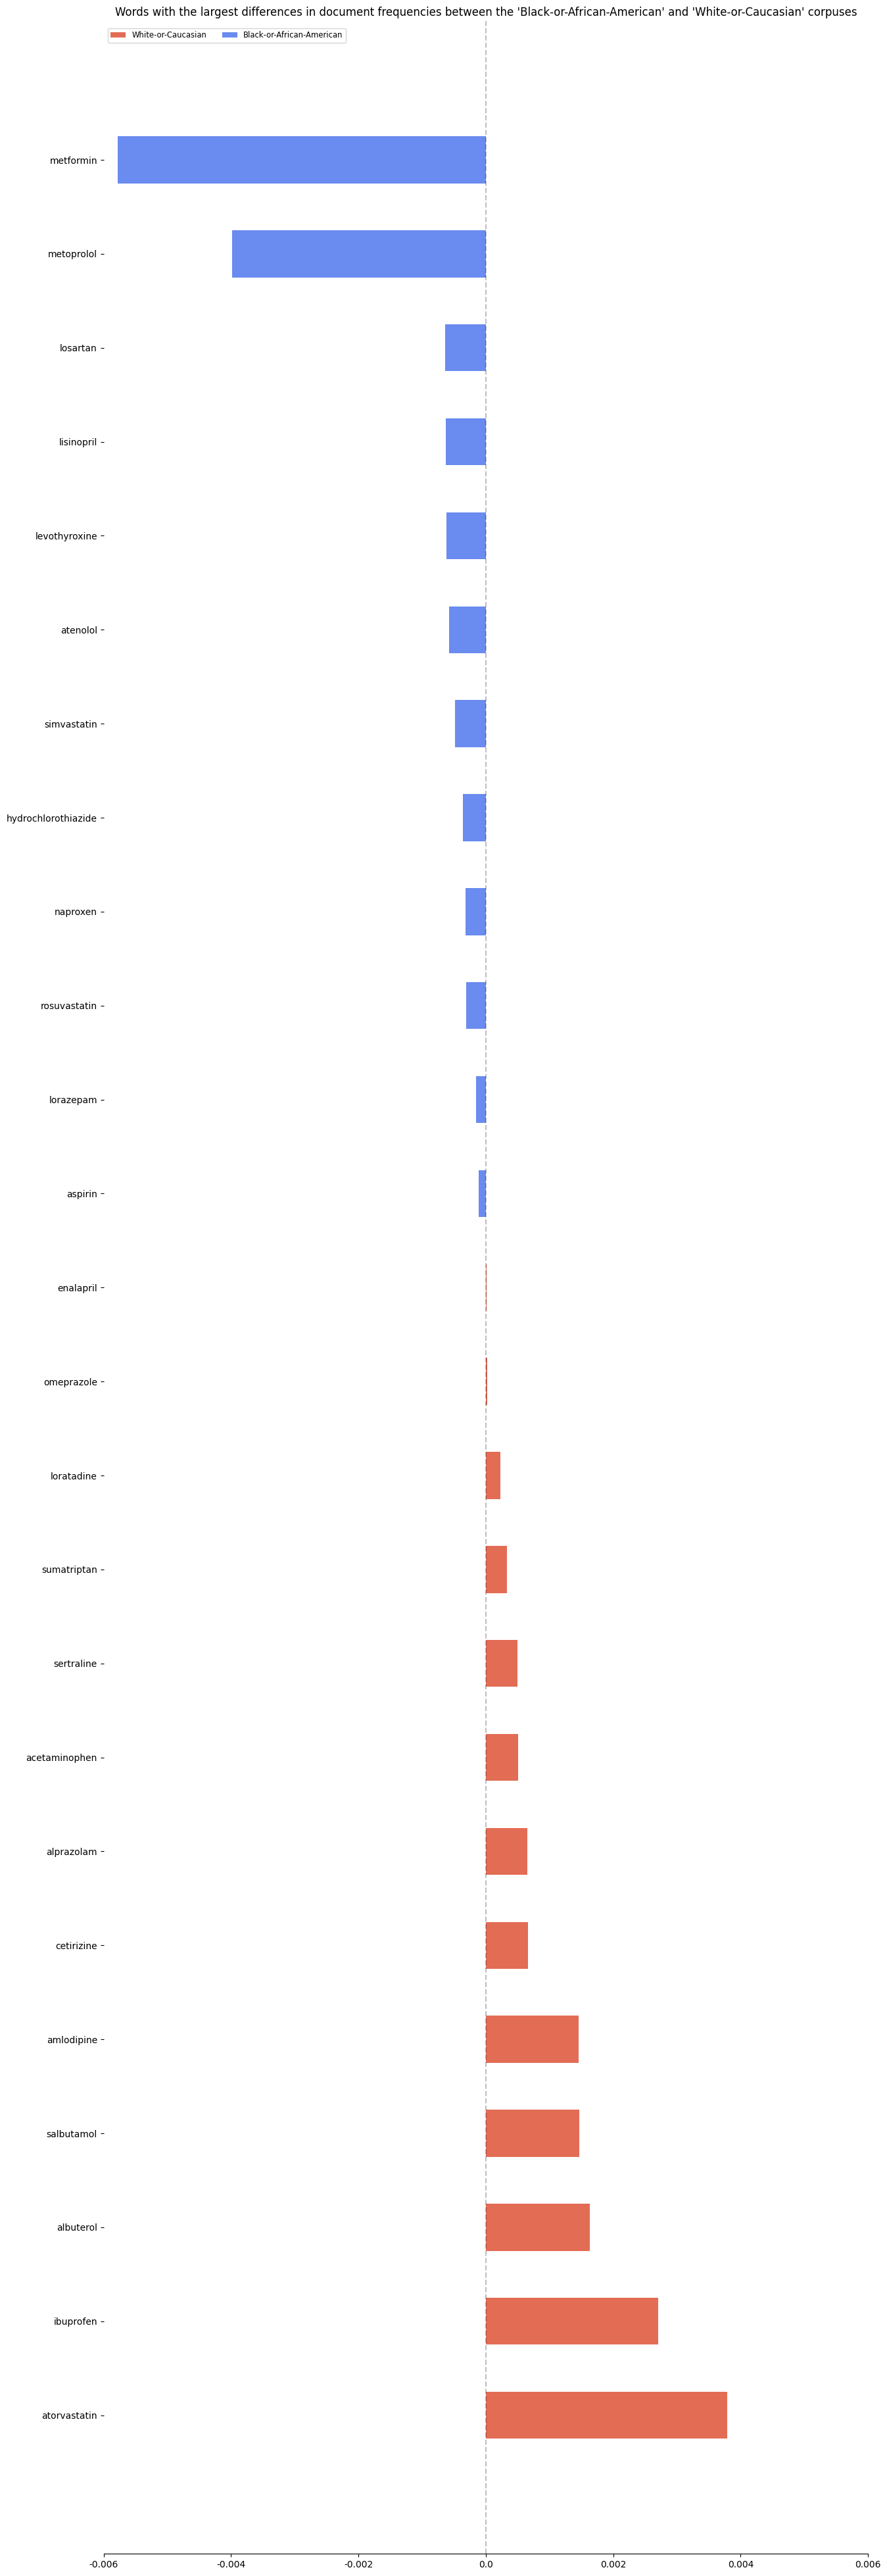

In [13]:
# Positive Negative Bar Chart to better visualize where word frequencies diverge between data sets
# Based on https://stackoverflow.com/a/69976552/11407943
import numpy as np
import matplotlib.pyplot as plt


category_names = ["White-or-Caucasian", "Black-or-African-American"]
results = chart_data


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1] // 2
    offsets = 0  # data[:, range(middle_index)].sum(axis=1) # + data[:, middle_index]/2

    # Color Mapping
    category_colors = plt.get_cmap("coolwarm_r")(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 50))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(
            labels, widths, left=starts, height=0.5, label=colname, color=color
        )

    # Add Zero Reference Line
    ax.axvline(0, linestyle="--", color="black", alpha=0.25)

    # X Axis
    ax.set_xlim(-0.006, 0.006)
    # ax.set_xticks(np.arange(-0.0035, 0.0035, 0.003))
    ax.xaxis.set_major_formatter(lambda x, pos: str(x))

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Ledgend
    ax.legend(
        ncol=len(category_names),
        bbox_to_anchor=(0, 0.99),
        loc="lower left",
        fontsize="small",
    )

    # Set Background Color
    fig.set_facecolor("#FFFFFF")

    return fig, ax


fig, ax = survey(results, category_names)
plt.title(
    "Words with the largest differences in document frequencies between the 'Black-or-African-American' and 'White-or-Caucasian' corpuses"
)
plt.show()

In [14]:
import scipy
from sklearn.feature_extraction import text
from collections import Counter

In [15]:
b_just_names_lower = [list(map(lambda x: x.lower(), arr)) for arr in b_just_names]
b_list_of_doc_counter = list(map(Counter, b_just_names_lower))
# element for sublist in w_just_names for element in sublist
w_just_names_lower = [list(map(lambda x: x.lower(), arr)) for arr in w_just_names]
w_list_of_doc_counter = list(map(Counter, w_just_names_lower))
b_just_names_lower
b_medications_names_counter = Counter([
    element for sublist in b_just_names_lower for element in sublist
])
w_medications_names_counter = Counter([
    element for sublist in w_just_names_lower for element in sublist
])

In [16]:
b_medications_names_counter

Counter({'lisinopril': 2510,
         'atorvastatin': 2012,
         'amlodipine': 458,
         'simvastatin': 410,
         'metoprolol': 279,
         'metformin': 123,
         'losartan': 106,
         'albuterol': 104,
         'salbutamol': 104,
         'hydrochlorothiazide': 40,
         'ibuprofen': 35,
         'atenolol': 24,
         'loratadine': 19,
         'aspirin': 17,
         'levothyroxine': 9,
         'acetaminophen': 6,
         'rosuvastatin': 5,
         'omeprazole': 5,
         'cetirizine': 4,
         'enalapril': 4,
         'lorazepam': 3,
         'naproxen': 3,
         'sumatriptan': 3,
         'sertraline': 2,
         'alprazolam': 1})

In [17]:
w_medications_names_counter

Counter({'lisinopril': 2457,
         'atorvastatin': 1996,
         'amlodipine': 458,
         'simvastatin': 399,
         'metoprolol': 249,
         'albuterol': 112,
         'salbutamol': 111,
         'losartan': 100,
         'metformin': 85,
         'ibuprofen': 51,
         'hydrochlorothiazide': 37,
         'atenolol': 20,
         'loratadine': 20,
         'aspirin': 16,
         'acetaminophen': 9,
         'cetirizine': 8,
         'alprazolam': 5,
         'levothyroxine': 5,
         'sumatriptan': 5,
         'omeprazole': 5,
         'sertraline': 5,
         'enalapril': 4,
         'rosuvastatin': 3,
         'lorazepam': 2,
         'serotonin': 1,
         'benazepril': 1,
         'naproxen': 1,
         'diazepam': 1})

In [18]:
total_keys = list(set(list(w_medications_names_counter.keys()) + list(b_medications_names_counter.keys())))
new_counts = {}
aa = []
ca = []
for k in total_keys:
    # [aa,ca]
    new_counts[k] = [b_medications_names_counter.get(k,0),w_medications_names_counter.get(k,0)]
    aa.append(b_medications_names_counter.get(k,0))
    ca.append(w_medications_names_counter.get(k,0))

c_table = pd.DataFrame.from_dict(new_counts)
c_table



,lorazepam,naproxen,ibuprofen,atorvastatin,loratadine,sumatriptan,alprazolam,serotonin,sertraline,metformin,...,hydrochlorothiazide,benazepril,enalapril,lisinopril,losartan,rosuvastatin,levothyroxine,aspirin,simvastatin,amlodipine
0,3,3,35,2012,19,3,1,0,2,123,...,40,0,4,2510,106,5,9,17,410,458
1,2,1,51,1996,20,5,5,1,5,85,...,37,1,4,2457,100,3,5,16,399,458


In [19]:
class bcolors:
    HEADER = "\033[95m"
    OKBLUE = "\033[94m"
    OKCYAN = "\033[96m"
    OKGREEN = "\033[92m"
    WARNING = "\033[93m"
    FAIL = "\033[91m"
    ENDC = "\033[0m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"

In [20]:
# Chi square independence test
# https://www.dir.uniupo.it/pluginfile.php/138296/mod_resource/content/0/22-colloc-bw.pdf
for k in list(set(total_keys)):
    # For AA [Number of instances of current word, Number of instances of all other words]
    x1 =[c_table[k].iloc[0], c_table.iloc[0].sum() - c_table[k].iloc[0]]
    # For CA [Number of instances of current word, Number of instances of all other words]
    y1 =[c_table[k].iloc[1], c_table.iloc[1].sum() - c_table[k].iloc[1]]
    test = scipy.stats.chi2_contingency([x1,y1])
    word = c_table[k].name
    if test.pvalue < 0.01:
        print(f'Word: {k}')
        print(f'AA: {x1}')
        print(f'CA: {y1}')
        print(
            f'There is a significant difference in the frequency of the word {word} with a p-value of {bcolors.OKGREEN + "{:0.3f}".format(test.pvalue) + bcolors.ENDC}'
            + bcolors.ENDC
        )
        print(f'')

    elif test.pvalue < 0.05:
        print(f'Word: {k}')
        print(f'AA: {x1}')
        print(f'CA: {y1}')
        print(
            f'There is a significant difference in the frequency of the word {word} with a p-value of {bcolors.OKGREEN +"{:0.3f}".format(test.pvalue) + bcolors.ENDC}'
        )
        print(f'')

    # else:
    #     print(
    #         f'There was no significant difference in the frequency of the word {word} with a p-value of {"{:0.3f}".format(test.pvalue)}'
    #     )  
      



Word: metformin
AA: [123, 6163]
CA: [85, 6081]
There is a significant difference in the frequency of the word metformin with a p-value of 0.014

